In [287]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [288]:
test = pd.read_csv("test.csv") #Dataframe untuk Test machine learning kita
train = pd.read_csv("train.csv") #Dataframe yg akan kita latih

In [289]:
show = pd.concat([train.head(4), train.tail(4)])
show

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
11684,cluster_1_2021-12-31,2021-12-31,cluster_1,354.565,14.7,7.7,13.4,5.2,19148.153333,29727.200000,20.7,37.4,201.332279,3.510000,0.513333
11685,cluster_2_2021-12-31,2021-12-31,cluster_2,507.510,16.2,7.0,16.3,4.5,20570.920000,30594.280000,23.3,40.7,186.250597,5.006667,0.733333
11686,cluster_3_2021-12-31,2021-12-31,cluster_3,705.999,15.9,5.9,15.9,3.2,26860.350000,31496.173333,15.1,27.7,196.223902,5.783333,0.720000
11687,cluster_4_2021-12-31,2021-12-31,cluster_4,992.349,14.6,5.5,13.3,3.3,23063.000000,30713.893333,16.4,28.8,192.980343,4.816667,0.560000


In [290]:
train['cluster_id'] = train['cluster_id'].str.replace('cluster_', '')
train['cluster_id'] = train['cluster_id'].astype(int)

# 4 Cluster dengan rentang waktu 2014-2021.
#### Membuat model prediksi konsumsi listrik harian (dalam satuan GWh) 

- electricity_consumption     =  konsumsi listrik harian (GWh)
- temperature_2m_max          =  suhu maksimum 2 meter
- temperature_2m_min          =  suhu minimum 2 meter
- apparent_temperature_max    =  suhu terasa maksimum
- apparent_temperature_min    =  suhu terasa minimum
- sunshine_duration           =  durasi sinar matahari
- daylight_duration           =  durasi siang hari
- wind_speed_10m_max          =  kecepatan angin maksimum di 10m
- wind_gusts_10m_max          =  hembusan angin maksimum di 10m
- wind_direction_10m_dominant =  arah angin dominan di 10m
- shortwave_radiation_sum     =  total radiasi gelombang pendek
- et0_fao_evapotranspiration  =  evapotranspirasi referensi FAO

In [291]:
train.duplicated().sum()

0

In [292]:
train.isnull().sum().sum()

0

In [293]:
train.dtypes

ID                              object
date                            object
cluster_id                       int32
electricity_consumption        float64
temperature_2m_max             float64
temperature_2m_min             float64
apparent_temperature_max       float64
apparent_temperature_min       float64
sunshine_duration              float64
daylight_duration              float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
shortwave_radiation_sum        float64
et0_fao_evapotranspiration     float64
dtype: object

In [294]:
train['ID'] = train['ID'].astype('string')
train['date'] = pd.to_datetime(train['date'])
#train['cluster_id'] = train['cluster_id'].astype('category')

In [295]:
train.describe()

,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11688,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,2017-12-31 12:00:00,2.500000,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.420115,202.335554,12.742257,2.428585
min,2014-01-01 00:00:00,1.000000,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333
25%,2016-01-01 00:00:00,1.750000,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000
50%,2017-12-31 12:00:00,2.500000,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667
75%,2020-01-01 00:00:00,3.250000,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667
max,2021-12-31 00:00:00,4.000000,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,126.700000,360.000000,29.983333,8.133333
std,NaN,1.118082,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.226372,100.697741,7.588077,1.607845


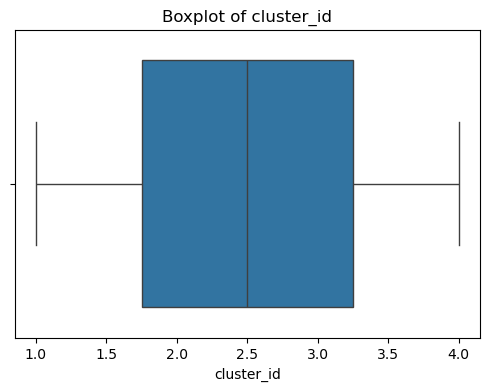

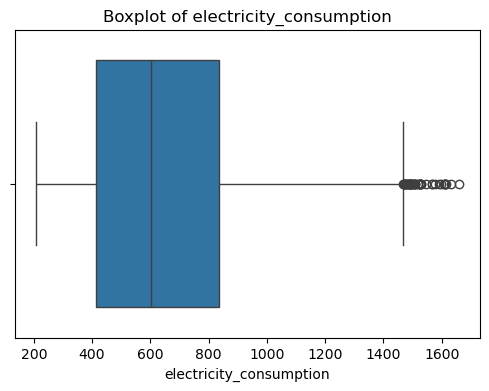

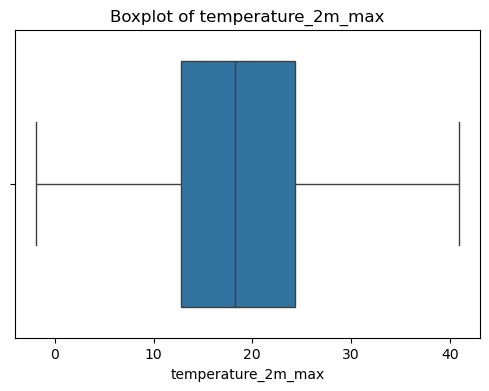

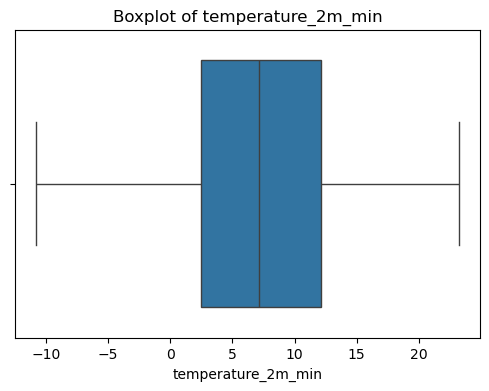

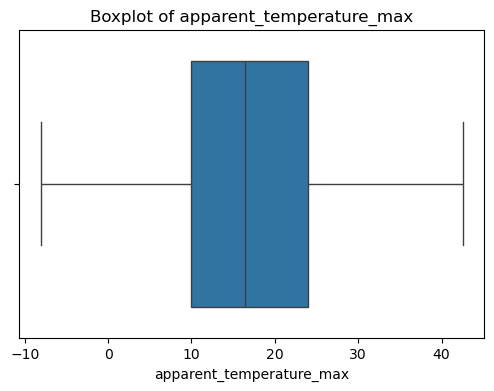

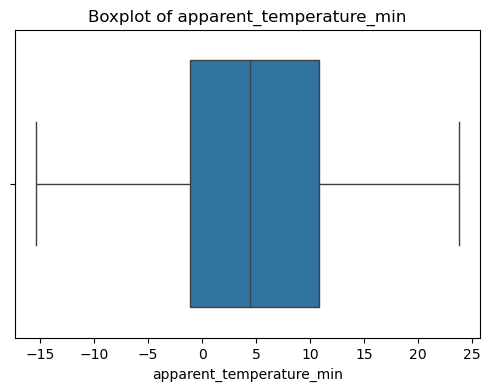

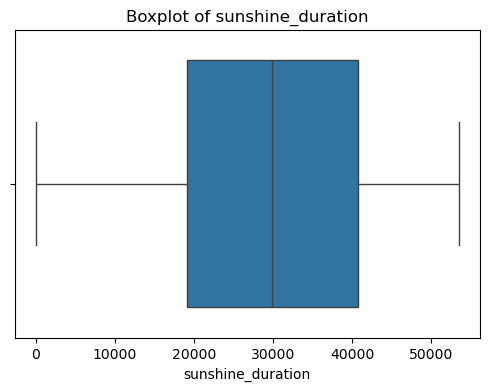

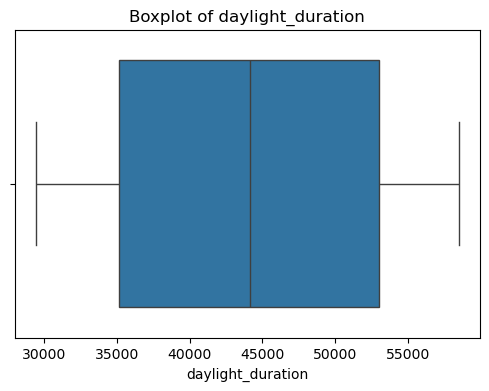

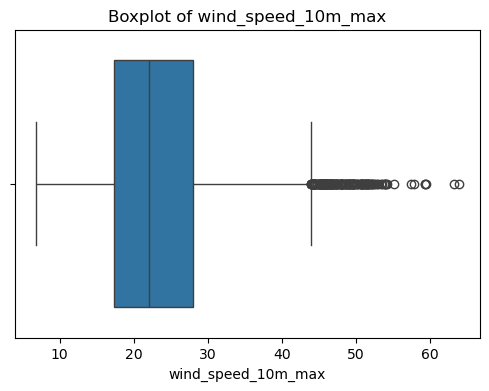

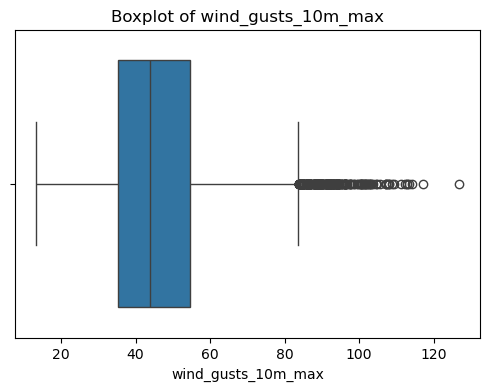

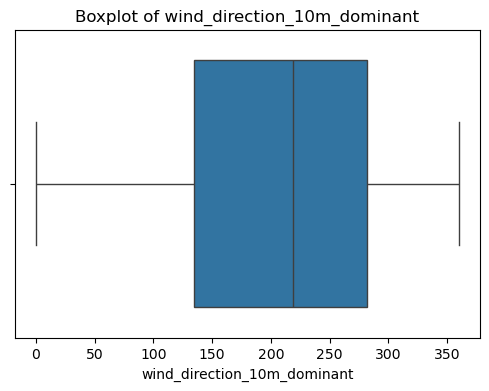

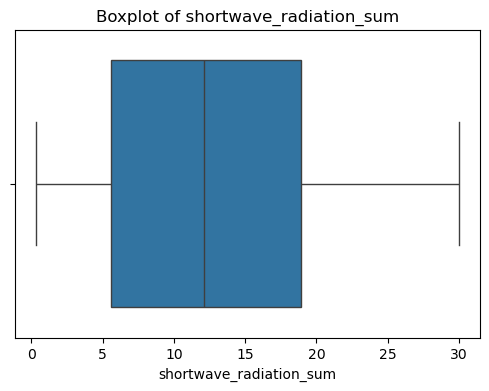

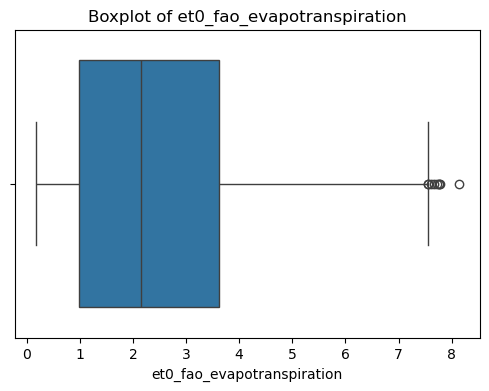

In [296]:
for i in train.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [297]:
cols_with_outliers = [
    "temperature_2m_max",
    "temperature_2m_min",
    "apparent_temperature_max",
    "apparent_temperature_min",
    "sunshine_duration",
    "wind_speed_10m_max"
]

for col in cols_with_outliers:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train[col] = train[col].clip(lower, upper)

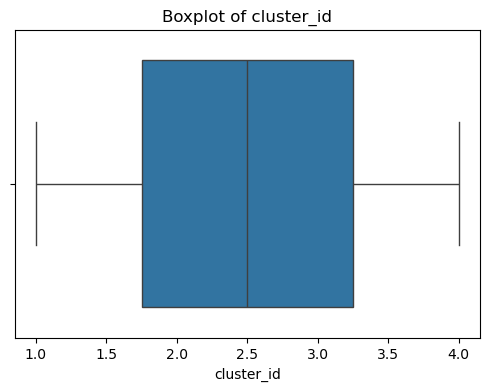

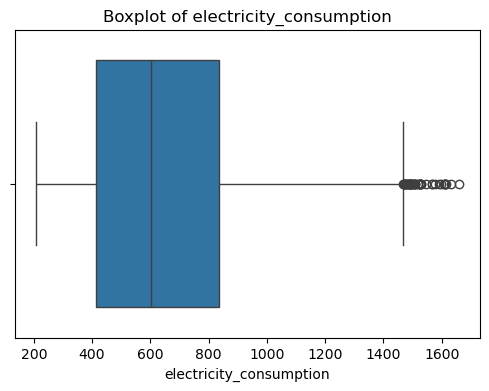

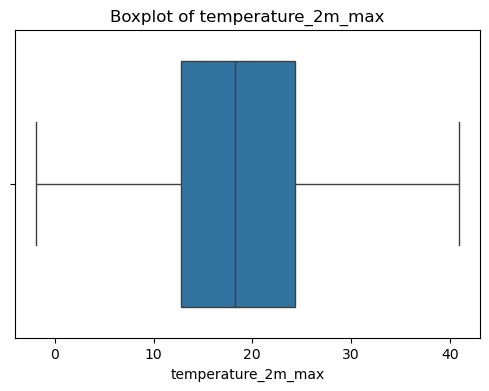

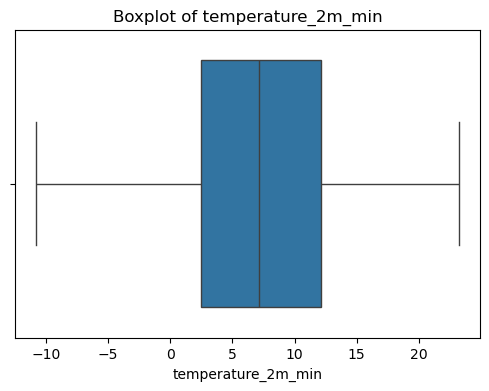

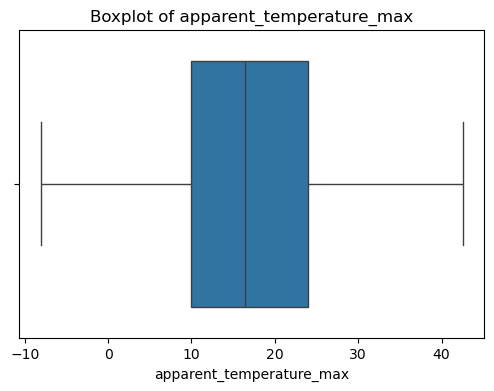

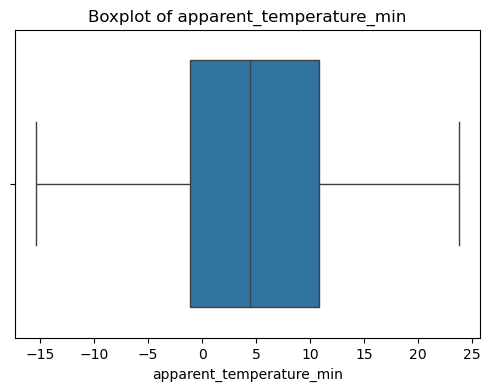

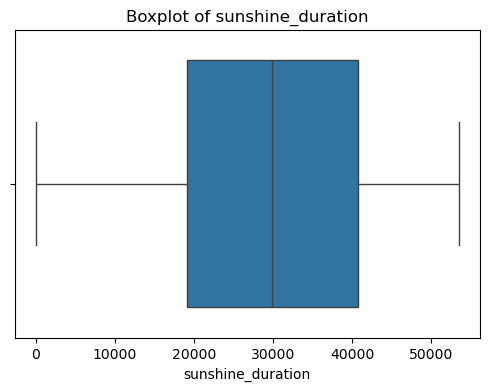

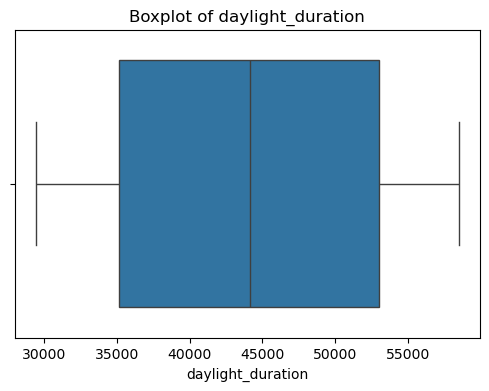

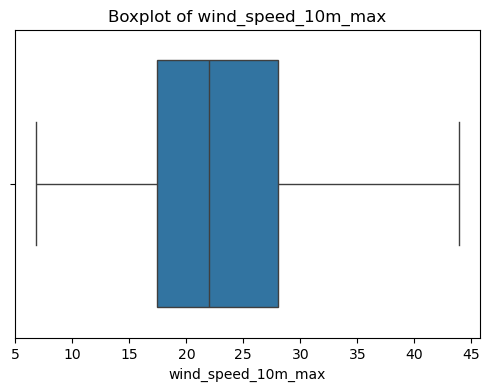

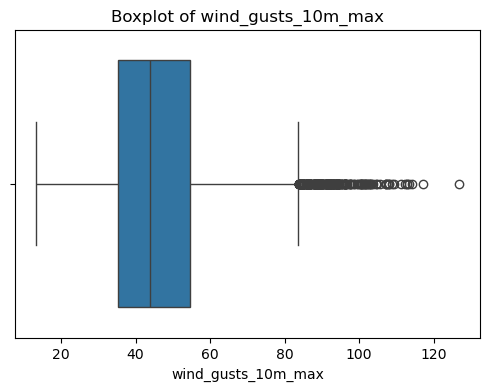

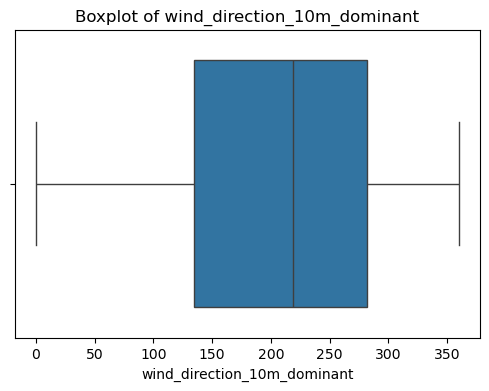

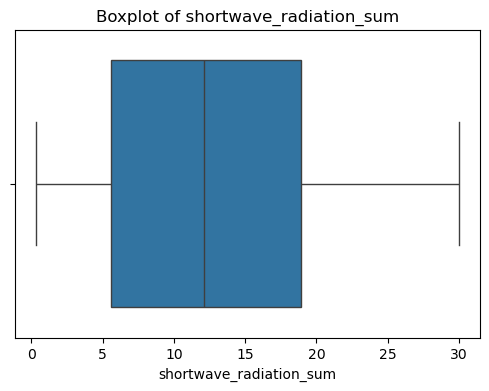

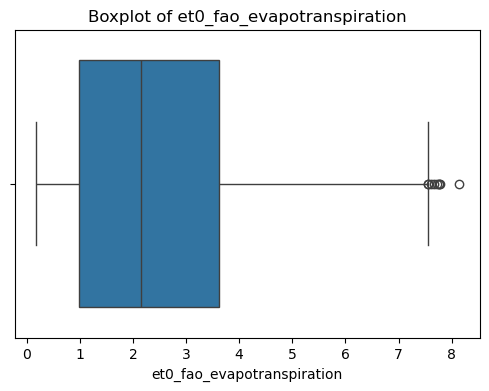

In [298]:
for i in train.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [299]:
train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [300]:
x_train = train.drop(columns=['electricity_consumption','ID','date'])
y_train = train['electricity_consumption']

In [301]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [302]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [303]:
y_pred = model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE di validation set:", rmse)

RMSE di validation set: 50.97413791997843


In [304]:
import joblib

cobaLAGI = 'cobaLAGI.joblib'
joblib.dump(model, cobaLAGI)

['cobaLAGI.joblib']